## Data Analysis on the Crimes by state combined with unemployment
This notebook carries out an exploratory analysis on the relationship between various forms of crime in various states and unemployment. Plots are generated to easily visualise this relationship

In [15]:
# importing relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# reading in the csv file into dataframe

df = pd.read_csv("../data/crimebystatecombinedwithunemployment.csv")
df

,state,unemployment,year,Population,violent total,Murder,rape,Robbery,Aggravated assault,property total,Burglary,Larceny theft,vehicle theft
0,AL,6.808,1976,3665000,388.8,15.1,21.7,96.0,256.0,3419.5,1170.0,1987.2,262.3
1,AL,7.325,1977,3690000,414.4,14.2,25.2,96.8,278.3,3298.2,1135.5,1881.9,280.7
2,AL,6.380,1978,3742000,419.1,13.3,25.5,99.1,281.2,3519.7,1229.3,1987.9,302.5
3,AL,7.158,1979,3769000,413.3,13.2,27.5,109.5,263.1,3830.5,1287.3,2223.2,320.1
4,AL,8.867,1980,3861466,448.5,13.2,30.0,132.1,273.2,4485.1,1526.7,2642.2,316.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,WY,6.458,2010,564554,197.9,1.4,28.7,13.6,154.1,2456.6,381.0,1970.8,104.9
1985,WY,5.808,2011,567356,219.4,3.2,25.7,12.5,178.0,2269.8,328.5,1849.5,91.8
1986,WY,5.317,2012,576626,201.3,2.4,26.7,10.6,161.6,2293.0,368.5,1823.2,101.3
1987,WY,4.725,2013,583223,207.8,2.9,24.7,12.7,157.2,2196.2,335.4,1761.8,99.1


## Preliminary Exploration

In [17]:
df.head()

,state,unemployment,year,Population,violent total,Murder,rape,Robbery,Aggravated assault,property total,Burglary,Larceny theft,vehicle theft
0,AL,6.808,1976,3665000,388.8,15.1,21.7,96.0,256.0,3419.5,1170.0,1987.2,262.3
1,AL,7.325,1977,3690000,414.4,14.2,25.2,96.8,278.3,3298.2,1135.5,1881.9,280.7
2,AL,6.380,1978,3742000,419.1,13.3,25.5,99.1,281.2,3519.7,1229.3,1987.9,302.5
3,AL,7.158,1979,3769000,413.3,13.2,27.5,109.5,263.1,3830.5,1287.3,2223.2,320.1
4,AL,8.867,1980,3861466,448.5,13.2,30.0,132.1,273.2,4485.1,1526.7,2642.2,316.2


In [18]:
df.describe()

,unemployment,year,Population,violent total,Murder,rape,Robbery,Aggravated assault,property total,Burglary,Larceny theft,vehicle theft
count,1989.000000,1989.000000,1.989000e+03,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000
mean,6.127662,1995.000000,5.215378e+06,464.795676,6.651785,34.014027,141.697436,281.850478,4014.478331,963.827401,2674.476823,376.174510
std,2.080686,11.257459,5.815880e+06,295.760230,6.560408,13.540267,147.927363,163.740775,1270.984536,428.554019,771.977562,232.377922
min,2.300000,1976.000000,3.820000e+05,47.000000,0.200000,5.600000,6.400000,31.300000,1524.400000,257.200000,1160.800000,38.900000
25%,4.617000,1985.000000,1.316807e+06,275.500000,3.200000,24.900000,67.100000,163.600000,3043.100000,632.200000,2112.700000,210.100000
50%,5.800000,1995.000000,3.520355e+06,412.300000,5.400000,31.700000,112.500000,248.700000,3919.500000,908.400000,2623.500000,326.500000
75%,7.325000,2005.000000,6.098000e+06,590.000000,8.400000,41.300000,169.200000,366.200000,4758.200000,1198.300000,3091.900000,473.300000
max,17.825000,2014.000000,3.880250e+07,2921.800000,80.600000,102.200000,1635.100000,1557.600000,9512.100000,2906.700000,5833.800000,1839.900000


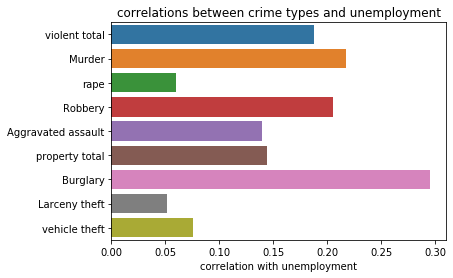

In [19]:
def plot_crime_corr(raw_df, axis = None):
    raw_df_sub = raw_df.drop(columns = ["state", "year", "Population"])
    plt.title("correlations between crime types and unemployment")
    ax = sns.barplot(y = raw_df_sub.columns[1:], 
                    x = raw_df_sub.corr().iloc[0, 1:],
                    ax = axis)
    ax.set(xlabel = "correlation with unemployment")
    plt.savefig("../images/correlation.png")
    

plot_crime_corr(df)

In [8]:
df["unit_burglary"] = df["Burglary"]/df["Population"] 
df["unit_burglary"] = df["unit_burglary"]/df.unit_burglary.max()
df.head()

# sns.scatterplot(x = "unemployment", y = "Burglary", data = df)

,state,unemployment,year,Population,violent total,Murder,rape,Robbery,Aggravated assault,property total,Burglary,Larceny theft,vehicle theft,unit_burglary
0,AL,6.808,1976,3665000,388.8,15.1,21.7,96.0,256.0,3419.5,1170.0,1987.2,262.3,0.076718
1,AL,7.325,1977,3690000,414.4,14.2,25.2,96.8,278.3,3298.2,1135.5,1881.9,280.7,0.073951
2,AL,6.380,1978,3742000,419.1,13.3,25.5,99.1,281.2,3519.7,1229.3,1987.9,302.5,0.078948
3,AL,7.158,1979,3769000,413.3,13.2,27.5,109.5,263.1,3830.5,1287.3,2223.2,320.1,0.082080
4,AL,8.867,1980,3861466,448.5,13.2,30.0,132.1,273.2,4485.1,1526.7,2642.2,316.2,0.095014


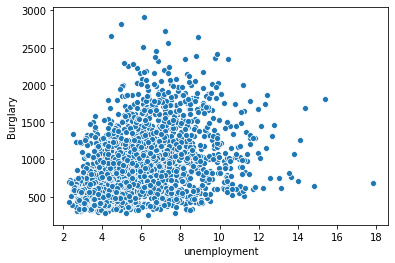

In [10]:
sns.scatterplot(x = "unemployment", y = "Burglary", data = df)

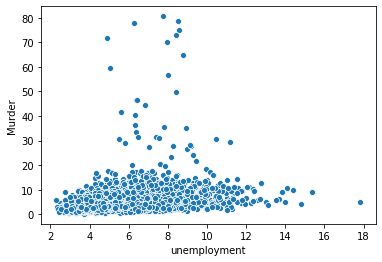

In [11]:
sns.scatterplot(x = "unemployment", y = "Murder", data = df)